In [37]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from ipywidgets import interact,interactive
import ipywidgets as widgets



In [58]:
def get_closest_point(clic_x,clic_y):
    # Get the data from the figure
    ax= plt.gca() # get axis handle
    acoustic_data = ax.lines[0]
    optic_data = ax.lines[1]

    # Find which line was closer
    #closet x data
    k_a = acoustic_data.get_xdata()
    k_o = optic_data.get_xdata()
    diff_k_a = np.abs(k_a-clic_x)
    diff_k_o = np.abs(k_o-clic_x)
    # get the x index corresponding to the closet k in the graph for both branches
    index_a = np.argmin(diff_k_a)
    index_o = np.argmin(diff_k_o)

    # compute the distance on the y axis
    y_diff_a = np.abs(acoustic_data.get_ydata()[index_a]-clic_y)
    y_diff_o = np.abs(optic_data.get_ydata()[index_o]-clic_y)

    ac_is_closer = y_diff_a<y_diff_o
    # print a x at the postion 
    if(ac_is_closer):
        return [acoustic_data.get_xdata()[index_a], acoustic_data.get_ydata()[index_a]]
    else:
        return [optic_data.get_xdata()[index_a], optic_data.get_ydata()[index_a]]

def onclick(event):
    plt.subplot(1,2,1)
    ax=plt.gca()
    # clear the previous point 
    for i in np.arange(3, len(ax.lines)+1) :
        ax.lines.pop()
    # Get the coordonate of the data closest from the click
    [x,y]=get_closest_point(event.xdata,event.ydata)
    plt.plot(x, y, '.',color='red')
    
    # display the animation
    plt.subplot(1,2,2)
    ax=plt.gca()
    # clear the previous point 
    for i in np.arange(len(ax.lines)) :
        ax.lines.pop()
    k_span=np.linspace(0,2*np.pi,100)
    plt.plot(k_span,np.sin(k_span*x))
    fig.canvas.draw()

    
def interactive_lattice_plot(G,K):
    '''
    :param G,K: coupling
    plot acoustic and optical phonons bands
    '''
    plt.close()
    fig=plt.figure()
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

    k = np.linspace(-np.pi/2,np.pi/2,100)

    omega_o = G+K-np.sqrt((G+K)**2-4*G*K*np.sin(k)**2)
    omega_a = G+K+np.sqrt((G+K)**2-4*G*K*np.sin(k)**2)
    plt.subplot(1,2,1)
    plt.plot(k,np.sqrt(omega_a))
    plt.plot(k,np.sqrt(omega_o))
    plt.xlabel("k")
    plt.ylabel("omega")
    plt.subplot(1,2,2)
    plt.plot(k,np.sqrt(omega_a))
    plt.show()



In [59]:
interactive_plot = interactive(interactive_lattice_plot, G=(1, 6.0), K=(1, 6.0))
interactive_plot


interactive(children=(FloatSlider(value=3.5, description='G', max=6.0, min=1.0), FloatSlider(value=3.5, descri…

In [8]:
 def tmp_fct(x):
    # display the animation
    an_fig = plt.figure()
    x_span = np.linspace(0,np.pi)
    oscillator = np.sin(x_span*x)
    plt.plot(x_span,oscillator)
    plt.show()

<IPython.core.display.Javascript object>


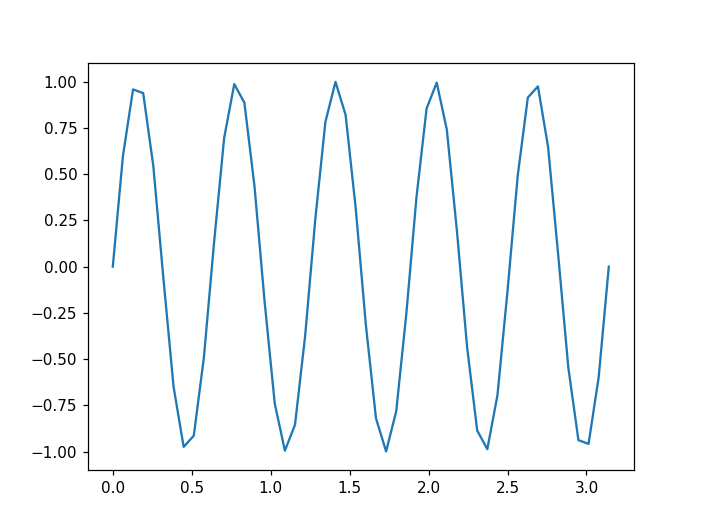

In [5]:
tmp_fct(10)

In [25]:
ax=plt.gca()

In [26]:
print(ax.lines)

[<matplotlib.lines.Line2D object at 0x7fe7997ae160>, <matplotlib.lines.Line2D object at 0x7fe799eca4e0>, <matplotlib.lines.Line2D object at 0x7fe79998b668>]


<IPython.core.display.Javascript object>


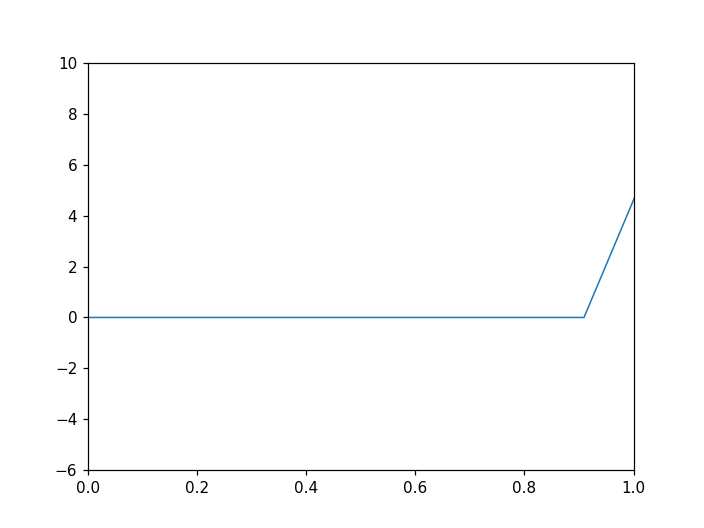

In [45]:
from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-6, 10))
line, = ax.plot([], [], lw=1)
x=np.linspace(0,10,100)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line.set_data(x, x**i)
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


